N.sathwika AIE23119

Question 1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd

data=pd.read_csv("C:/Users/vanga/Downloads/Agrofood_co2_emission.csv")
X_train=data[['IPPU']]
y_train=data['total_emission']

imputer=SimpleImputer(strategy='mean')
X_train_imputed=imputer.fit_transform(X_train)

reg=LinearRegression().fit(X_train_imputed,y_train)
y_train_pred=reg.predict(X_train_imputed)
print(f"y_train_pred : {y_train_pred}")


y_train_pred : [27709.40653571 27722.39300755 27731.73017229 ... 29100.35716926
 29062.97945121 29052.82348216]


Question 2)

In [6]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
import numpy as np

X_test=data[['IPPU']]
y_test=data['total_emission']

X_test_imputed=imputer.transform(X_test)
y_test_pred=reg.predict(X_test_imputed)

mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=np.sqrt(mse_train)
mae_train=mean_absolute_error(y_train,y_train_pred)
r2_train=r2_score(y_train,y_train_pred)

mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=np.sqrt(mse_test)
mae_test=mean_absolute_error(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)

print("Training set metrics")
print(f"mse: {mse_train}")
print(f"rmse: {rmse_train}")
print(f"mae: {mae_train}")
print(f"r2: {r2_train}")

print("\nTesting set metrics:")
print(f"mse: {mse_test}")
print(f"rmse: {rmse_test}")
print(f"mae: {mae_test}")
print(f"r2: {r2_test}")


Training set metrics
mse: 14611489245.111755
rmse: 120877.99322089921
mae: 47537.97276065398
r2: 0.7196531248227048

Testing set metrics:
mse: 14611489245.111755
rmse: 120877.99322089921
mae: 47537.97276065398
r2: 0.7196531248227048


Question 3)

In [7]:
X_train_more=data[['Savanna fires','Forest fires']]
X_test_more=data[['Savanna fires','Forest fires']]

X_train_more_imputed=imputer.fit_transform(X_train_more)
X_test_more_imputed=imputer.transform(X_test_more)

reg=LinearRegression().fit(X_train_more_imputed,y_train)
y_train_pred_more=reg.predict(X_train_more_imputed)
y_test_pred_more=reg.predict(X_test_more_imputed)

print(f"y_train_pred_more : {y_train_pred_more}")
print(f"y_test_pred_more : {y_test_pred_more}")

y_train_pred_more : [50304.2051763  50304.2051763  50304.2051763  ... 54194.43776957
 53479.98027618 51212.06885599]
y_test_pred_more : [50304.2051763  50304.2051763  50304.2051763  ... 54194.43776957
 53479.98027618 51212.06885599]


Question 4)

In [9]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,random_state=2,n_init="auto").fit(X_train_more_imputed)
kmeans.labels_
kmeans.cluster_centers_

array([[  438.17760197,   376.81364009],
       [22485.58507173, 16319.56718819]])

Question 5)

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

kmeans=KMeans(n_clusters=2,random_state=42).fit(X_train_more_imputed)
silhouette_score(X_train_more_imputed,kmeans.labels_)
calinski_harabasz_score(X_train_more_imputed,kmeans.labels_)
davies_bouldin_score(X_test_more_imputed,kmeans.labels_)

print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Index: {davies_bouldin_score}")


Silhouette Score: <function silhouette_score at 0x000001E94795F1C0>
Calinski-Harabasz Score: <function calinski_harabasz_score at 0x000001E94795F490>
Davies-Bouldin Index: <function davies_bouldin_score at 0x000001E94795F5B0>


Question 6)

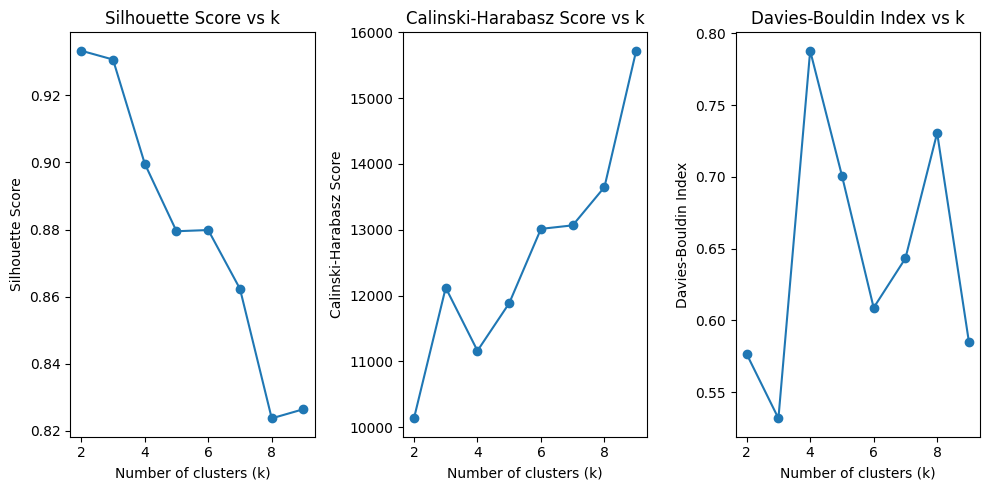

In [14]:
k_values = range(2, 10)  # Testing k from 2 to 10
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_more_imputed)
    
    silhouette_scores.append(silhouette_score(X_train_more_imputed, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(X_train_more_imputed, kmeans.labels_))
    davies_scores.append(davies_bouldin_score(X_train_more_imputed, kmeans.labels_))

import matplotlib.pyplot as plt

# Plot the scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs k")

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs k")

plt.tight_layout()
plt.show()


Question 7)

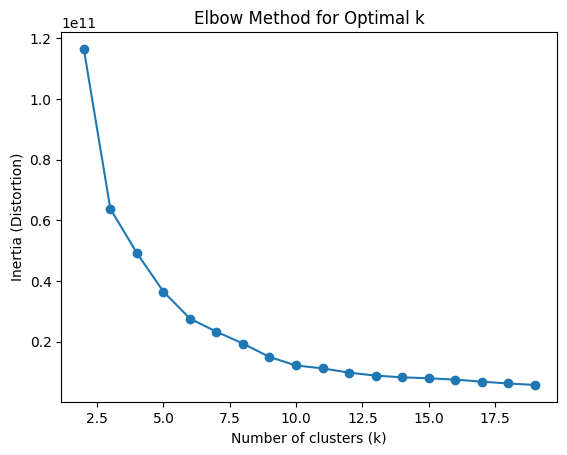

In [16]:
distortions = []
k_range = range(2, 20)  # Testing k from 2 to 20

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_more_imputed)
    distortions.append(kmeans.inertia_)

plt.plot(k_range, distortions, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal k")
plt.show()
